# Case Studies and Real-World Applications of Non-Linear Models

In this section, we will explore how non-linear models like decision trees, random forests, neural networks, and others are applied to solve real-world problems. We will walk through a few case studies, examine the key steps, and highlight the use of non-linear models in various industries.

---

## Table of Contents

1. [Case Study 1: Fraud Detection with Random Forests](#1-fraud-detection-with-random-forests)
2. [Case Study 2: Image Classification with Neural Networks](#2-image-classification-with-neural-networks)
3. [Case Study 3: Cancer Diagnosis with Support Vector Machines (SVM)](#3-cancer-diagnosis-with-svm)
4. [Case Study 4: Predicting Customer Churn with Gradient Boosting Machines (GBMs)](#4-predicting-customer-churn-with-gbms)
5. [Key Learnings](#5-key-learnings)

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 1. Fraud Detection with Random Forests

### Problem:
Financial institutions use Random Forests to identify and predict fraudulent transactions. This problem involves analyzing historical transaction data and building models to detect fraudulent activities.

### Steps Involved:
- **Data collection**: Historical transaction data (e.g., customer ID, transaction amount, location, time).
- **Preprocessing**: Handling missing values, encoding categorical variables.
- **Model**: Random Forest Classifier is used to predict fraud (binary classification).
- **Evaluation**: Metrics like precision, recall, and F1-score to assess performance.


In [ ]:
data = pd.read_csv(r"data\fraud_dataset_example.csv")

print(len(data[data["isFraud"] == 0]))
print(len(data[data["isFraud"] == 1]))

In [ ]:
print(data.isnull().sum())

In [ ]:
print(data.columns)

In [65]:
data.drop(columns=["step","nameOrig"],inplace=True)

In [ ]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

cat_cols = data.select_dtypes(["object","category"]).columns.to_list()
num_cols = data.select_dtypes(["int","float"]).columns.to_list()
num_cols.remove("isFraud")
data[num_cols] = scaler.fit_transform(data[num_cols])

for i in range(len(cat_cols)):
	data[cat_cols[i]] = label_encoder.fit_transform(data[cat_cols[i]])

data


In [77]:
from sklearn.utils import resample

min_class = data[data["isFraud"] == 1]
maj_class = data[data["isFraud"] == 0]

oversample = resample(min_class,n_samples=len(maj_class),random_state=42,replace=True)
oversampled_data = pd.concat([maj_class,oversample])

X = oversampled_data.drop(columns=["isFraud"])
y = oversampled_data["isFraud"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train,y_train)

In [ ]:
y_pred = forest.predict(X_test)

results = classification_report(y_test,y_pred)
print(results)

In [ ]:
corr = confusion_matrix(y_test,y_pred,normalize="true")
sns.heatmap(corr,annot=True,cmap="viridis")
plt.show()

## 2. Image Classification with Neural Networks
### Problem:
Neural Networks are used in image classification tasks, such as recognizing objects in images or distinguishing between different image categories. For example, detecting various animals in a photo dataset.

### Steps Involved:
- Data collection: Large dataset of images (e.g., CIFAR-10, ImageNet).
- Preprocessing: Image resizing, normalization.
- Model: Convolutional Neural Networks (CNNs) for feature extraction and classification.
- Evaluation: Accuracy, precision, and recall.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [67]:
class NyNet(nn.Module):
    def __init__(self):
        super(NyNet,self).__init__()
        self.cv1 = nn.Conv2d(in_channels=1,out_channels=4,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.cv2 = nn.Conv2d(in_channels=4,out_channels=16,kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.fc1 = nn.Linear(in_features=16*7*7, out_features=64)
        self.fc2 = nn.Linear(in_features=64,out_features=10)
        
    def forward(self,x):
        x = self.cv1(x)
        print(x.shape)
        x = self.pool(x)
        x = self.relu(x)
        x = self.cv2(x)
        x = self.pool(x)
        x = self.relu(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [74]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5),)])
train_data = datasets.MNIST("./data",train=True,download=False,transform=transform)
test_data = datasets.MNIST("./data",train=True,download=False,transform=transform)
train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32,shuffle=False)
model = NyNet()
optimizer = optim.Adam(model.parameters(),lr=.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
NUM_EPOCH = 1

for epoch in range(NUM_EPOCH):
    for images,labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{NUM_EPOCH}], Loss: {loss.item():.4f}')


## 3. Cancer Diagnosis with Support Vector Machines (SVM)
### Problem:
SVMs are used in healthcare to classify diseases based on medical records. One common application is diagnosing cancer based on features like tumor size, texture, and smoothness.

### Steps Involved:
- Data collection: Medical data with features of tumors.
- Preprocessing: Normalization, feature scaling.
- Model: Support Vector Classifier (SVC) for binary classification.
- Evaluation: ROC curve, AUC score, confusion matrix.

In [4]:
from sklearn.svm import SVC

In [20]:
data = pd.read_csv(r"data\breast-cancer.csv")
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [23]:
num_cols = data.select_dtypes(["int","float"]).columns.to_list()
cat_cols = data.select_dtypes(["string","object"]).columns.to_list()
num_cols.remove("id")
print(len(num_cols),len(cat_cols))

30 1


In [24]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
from sklearn.preprocessing import LabelEncoder
data["diagnosis"] = LabelEncoder().fit_transform(data["diagnosis"])
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


<Axes: >

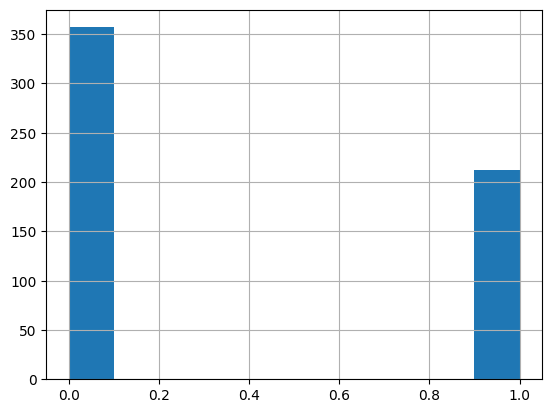

## 4. Predicting Customer Churn with Gradient Boosting Machines (GBMs)
### Problem:
Businesses often use GBMs to predict customer churn by analyzing customer behavior and identifying customers who are likely to stop using a service.

### Steps Involved:
- Data collection: Customer interaction data, service usage, and demographics.
- Preprocessing: Handling missing values, encoding categorical variables.
- Model: GBM-based classifier (e.g., XGBoost or LightGBM).
- Evaluation: Accuracy, precision, recall.

In [ ]:
#

## 5. Key Learnings
- Random Forests: Effective for classification tasks like fraud detection, offering good performance with minimal tuning.
- Neural Networks: Widely used in image recognition and complex pattern recognition.
- SVMs: Ideal for healthcare applications like cancer diagnosis where high-dimensional data and clear decision boundaries are present.
- GBMs: Used for customer churn prediction due to their ability to handle large datasets with many features